In [1]:
from keras_preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale= 1./255)
validation = ImageDataGenerator(rescale= 1./255)

In [2]:



train_dataset = train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Covid19-dataset/train',
                                          target_size = (64,64),
                                          batch_size = 6,
                                          class_mode='categorical',
                                          shuffle = False)
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/Covid19-dataset/test',
                                                    target_size = (64,64),
                                                    batch_size = 6,
                                                    class_mode='categorical',
                                                    shuffle = False)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [3]:

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

In [4]:
import keras
import numpy as np

In [5]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

In [6]:
model = Sequential()
input_shape=(64, 64, 3)#1st hidden layer
model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))

model.add(Activation('relu'))#2nd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))

model.add(Activation('relu'))#3rd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))

model.add(Activation('relu'))#Flatten
model.add(Flatten())

model.add(Dropout(rate=0.5))#Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(rate=0.5))#Output layer
model.add(Dense(3))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

In [8]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
history = model.fit_generator(train_dataset,
                              steps_per_epoch =  train_dataset.samples//6,
                              epochs = 20)

Epoch 1/20
15/41 [=========>....................] - ETA: 1:36 - loss: 0.7807 - accuracy: 0.6520

In [ ]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
import numpy as np
from keras.preprocessing import image

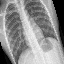

In [ ]:
new_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN/CNN-DOG_CAT CLASSIFICATION/generated_dataset/normal/normal (1).jpg', target_size=(64,64))
new_image

In [ ]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)

In [ ]:
result = model.predict(new_image)

In [ ]:
result

array([[1., 0., 0.]], dtype=float32)

In [ ]:
result[0][2]

0.0

In [ ]:
if result[0][0] == 1:
  print('COVID PATIENT')
elif result[0][1] == 1:
  print('NORMAL PATIENT')
else:
  print('viral patient')

COVID PATIENT
